# In depth 2 - Drawing hyperedges

Here we show the fuctionalities and parameters of `xgi.draw_hyperedges()`.  It is similar to the [networkx](https://networkx.org/documentation/stable/reference/drawing.html) corresponding function (+ some bonus) and heavily relies on [matplotlib](https://matplotlib.org/)'s Collection plotting.

In [12]:
import matplotlib.pyplot as plt

import xgi

Les us first create a small toy hypergraph containing edges of different sizes.

In [13]:
edges = [[1, 2, 3], [3, 4, 5], [3, 6], [6, 7, 8, 9], [1, 4, 10, 11, 12], [1, 4], [2, 5]]
H = xgi.Hypergraph(edges)

pos = xgi.barycenter_spring_layout(H, seed=42)  # fix position

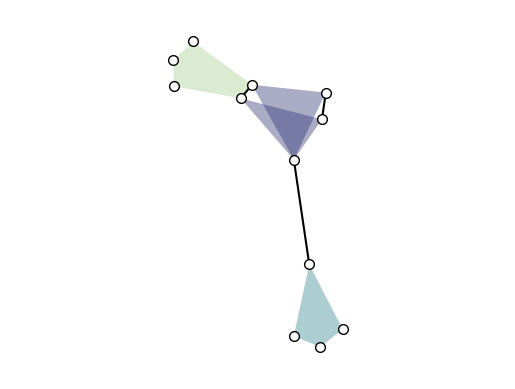

In [14]:
xgi.draw(H, pos=pos);

## Basics

Let's jump right into how `xgi.draw_hyperedges()` works. By default, it gives:

(<Axes: >,
 (<matplotlib.collections.LineCollection at 0x7c3453a969d0>,
  <matplotlib.collections.PatchCollection at 0x7c345337d8d0>))

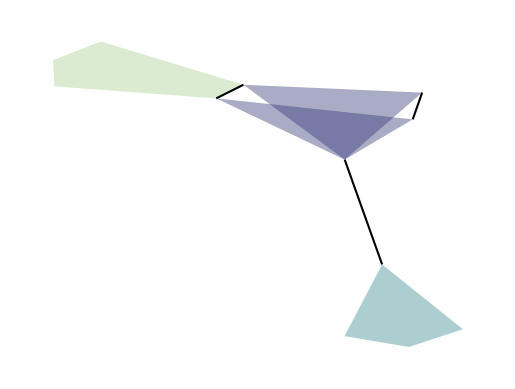

In [15]:
xgi.draw_hyperedges(H, pos=pos)

Notice that this function returns a tuple `(ax, collections)` where `collections` is a tuple `(dyad_collection, edge_collection)`. The collections can be used to plot colorbars as we will see later.

The color, linewidth, transparancy, and style of the hyperedges can all be customised, for example with single values:

(<Axes: >,
 (<matplotlib.collections.LineCollection at 0x7c3453aa89d0>,
  <matplotlib.collections.PatchCollection at 0x7c344f38a950>))

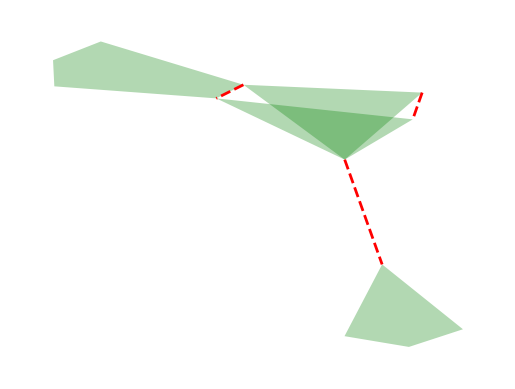

In [16]:
xgi.draw_hyperedges(
    H, pos=pos, dyad_color="r", dyad_lw=2, dyad_style="--", edge_fc="g", alpha=0.3
)

Or with multiple values:

(<Axes: >,
 (<matplotlib.collections.LineCollection at 0x7c344f38af10>,
  <matplotlib.collections.PatchCollection at 0x7c344f3d4a10>))

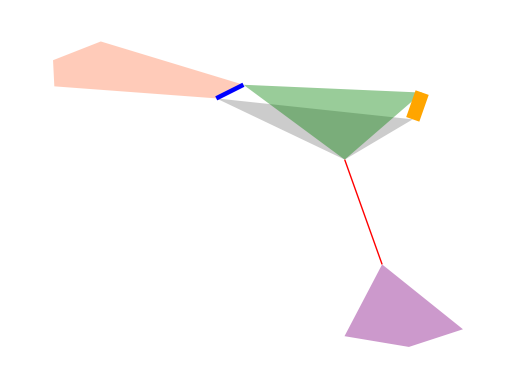

In [17]:
xgi.draw_hyperedges(
    H,
    pos=pos,
    dyad_color=["r", "b", "orange"],
    dyad_lw=[1, 2, 5],
    edge_fc=["g", "grey", "purple", "coral"],
)

## Arrays of floats and colormaps

In XGI, you can easily color hyperedges according to an EdgeStat, or just an array or a dict with float values:

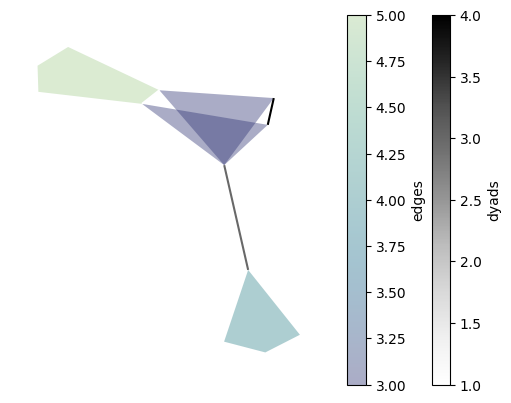

In [18]:
ax, (dyad_collection, edge_collection) = xgi.draw_hyperedges(
    H,
    pos=pos,
    dyad_color=[3, 1, 4],
    edge_fc=H.edges.size,
)

plt.colorbar(dyad_collection, label="dyads")
plt.colorbar(edge_collection, label="edges")

By default, the colormaps used are "crest_r" and "Greys". These can be changed:

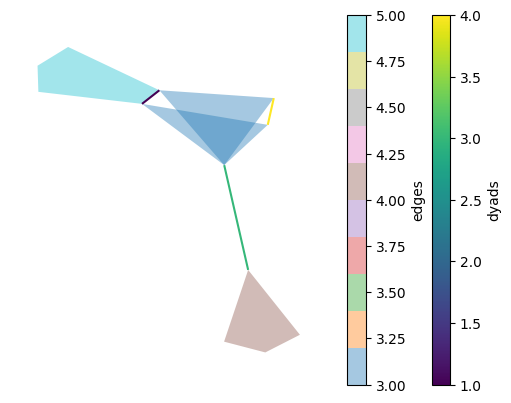

In [19]:
ax, (dyad_collection, edge_collection) = xgi.draw_hyperedges(
    H,
    pos=pos,
    dyad_color=[3, 1, 4],
    edge_fc=H.edges.size,
    dyad_color_cmap="viridis",
    edge_fc_cmap="tab10",
)

plt.colorbar(dyad_collection, label="dyads")
plt.colorbar(edge_collection, label="edges")

You can specify a `vmin` and `vmax` for the dyad and edge colors:

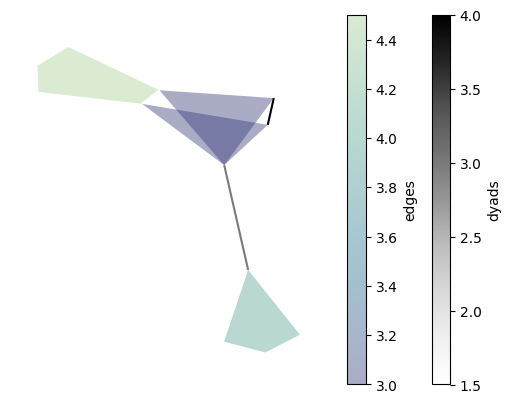

In [20]:
ax, (dyad_collection, edge_collection) = xgi.draw_hyperedges(
    H, pos=pos, dyad_color=[3, 1, 4], edge_fc=H.edges.size, dyad_vmin=1.5, edge_vmax=4.5
)

plt.colorbar(dyad_collection, label="dyads")
plt.colorbar(edge_collection, label="edges")

## Combine with nodes

This can be done either via `xgi.draw()`:

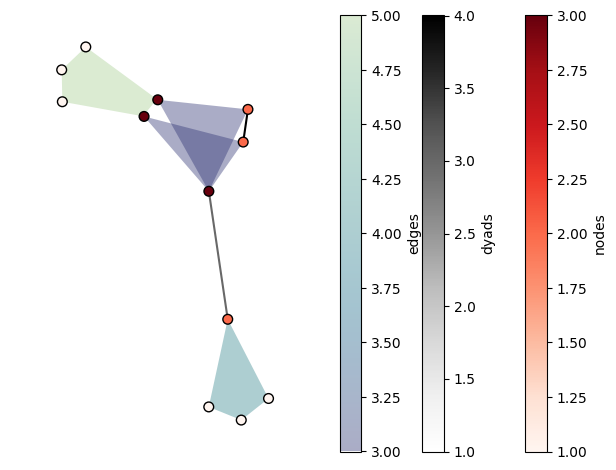

In [21]:
ax, collections = xgi.draw(
    H,
    pos=pos,
    node_fc=H.nodes.degree,
    dyad_color=[3, 1, 4],
    edge_fc=H.edges.size,
)

(node_collection, dyad_collection, edge_collection) = collections
plt.colorbar(node_collection, label="nodes")
plt.colorbar(dyad_collection, label="dyads")
plt.colorbar(edge_collection, label="edges")

plt.tight_layout()

or plotting the nodes and the edges separately:

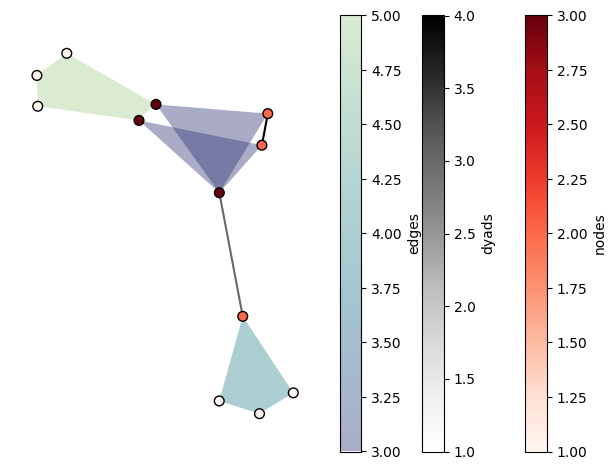

In [22]:
ax, (dyad_collection, edge_collection) = xgi.draw_hyperedges(
    H, pos=pos, dyad_color=[3, 1, 4], edge_fc=H.edges.size
)

ax, node_collection = xgi.draw_nodes(H, pos=pos, node_fc=H.nodes.degree, zorder=3)

plt.colorbar(node_collection, label="nodes")
plt.colorbar(dyad_collection, label="dyads")
plt.colorbar(edge_collection, label="edges")

plt.tight_layout()